In [42]:
from matplotlib import pyplot as plt
import tensorflow as tf
import numpy as np

# Load the TFLite model and allocate tensors.
interpreter = tf.lite.Interpreter(model_path="sinemodel.tflite")
interpreter.allocate_tensors()

# Get input and output tensors.
input_details = interpreter.get_input_details()
output_details = interpreter.get_output_details()

# Test the model on random input data.
input_shape = input_details[0]['shape']
input_data = np.array(np.random.random_sample(input_shape), dtype=np.float32)

input_values = np.linspace(0, 7.3, 100).astype(np.float32)
nn_outputs = []
analytical_outputs = []

def nn_sin(x):
    
    interpreter.set_tensor(input_details[0]['index'], np.reshape(x, [1,1]).astype(np.float32))
    interpreter.invoke()

    # The function `get_tensor()` returns a copy of the tensor data.
    # Use `tensor()` in order to get a pointer to the tensor.
    output_data = interpreter.get_tensor(output_details[0]['index'])
    return output_data.flatten()[0]

for input_data in input_values:

    nn_outputs.append(nn_sin(input_data))
    analytical_outputs.append(np.sin(input_data))
    
for x in [0.1, 0.25, 0.8]:
    print("x = {:.2f}, sin(x)={:.4f}, model(x)={:.4f}".format(x, np.sin(x), nn_sin(x)))

x = 0.10, sin(x)=0.0998, model(x)=0.1297
x = 0.25, sin(x)=0.2474, model(x)=0.2513
x = 0.80, sin(x)=0.7174, model(x)=0.6973


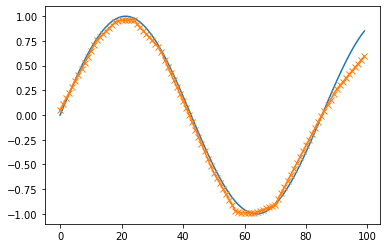

In [32]:
plt.plot(analytical_outputs, label="analytical")
plt.plot(nn_outputs, label="Neural Net model", marker="x")

In [35]:
input_data

7.3